In [1]:
import pandas as pd

In [2]:
df= pd.read_excel('ENB2012_data.XLSX')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,0.0,0.0
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760,NaN,NaN
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306,NaN,NaN
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,NaN,NaN
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,NaN,NaN
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,NaN,NaN
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,NaN,NaN
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    int64  
 6   X7           768 non-null    float64
 7   X8           768 non-null    int64  
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 72.1 KB


In [6]:
df.drop('Unnamed: 10',axis=1,inplace=True)

In [7]:
df.drop('Unnamed: 11',axis=1,inplace=True)

In [9]:
df = df.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3':'Wall Area',
                       'X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area',
                       'X8':'Glazing Area Distribution','Y1':'Heating Load','Y2':'Cooling Load'})

In [10]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [11]:
x = df.drop(['Heating Load','Cooling Load'],axis=1)

In [12]:
x.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [13]:
y = df[['Heating Load','Cooling Load']]

In [14]:
y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


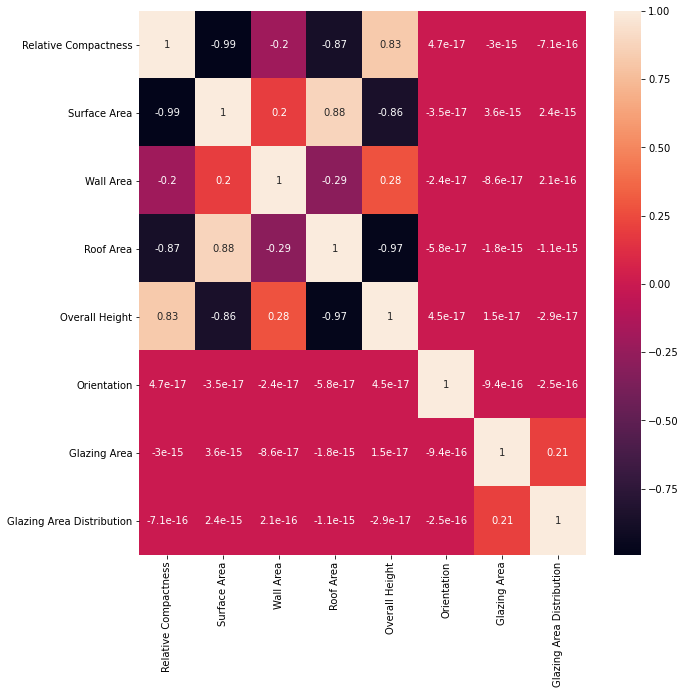

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

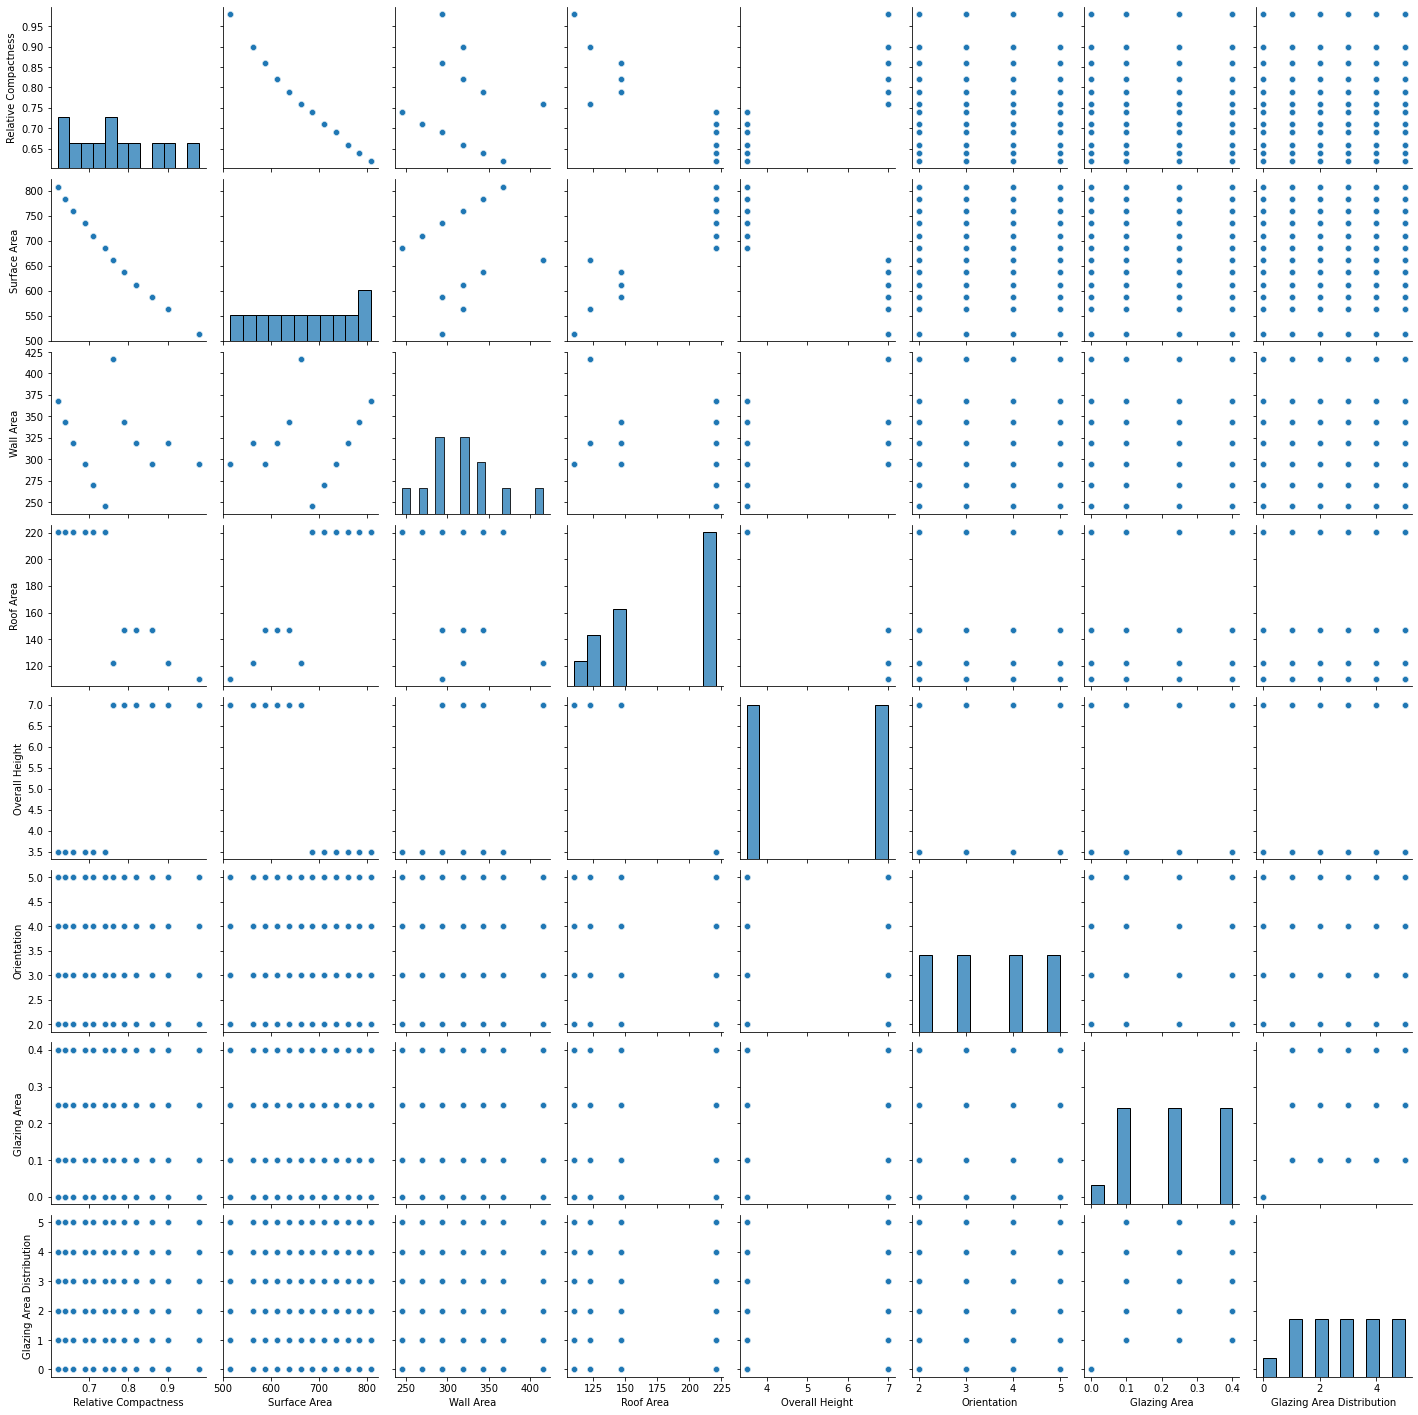

In [21]:
sns.pairplot(x)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.predict(X_test)

array([[18.80050279, 19.53750466],
       [13.97237779, 16.63125466],
       [31.19112779, 31.81094216],
       [35.90987779, 36.77187966],
       [15.37862779, 17.22500466],
       [28.65987779, 31.16250466],
       [24.98800279, 27.55312966],
       [27.98800279, 29.60000466],
       [17.69112779, 19.11562966],
       [27.58175279, 29.88125466],
       [18.08175279, 19.55312966],
       [34.36300279, 35.58437966],
       [27.75362779, 30.25625466],
       [ 8.62862779, 12.37344216],
       [18.61300279, 19.31875466],
       [36.86300279, 37.64687966],
       [37.51925279, 37.91250466],
       [11.37862779, 14.48281716],
       [15.22237779, 17.46719216],
       [34.33175279, 35.69375466],
       [34.39425279, 35.44375466],
       [35.26925279, 36.39687966],
       [10.94112779, 14.67812966],
       [29.98800279, 32.22500466],
       [12.62862779, 15.10000466],
       [29.97237779, 32.33437966],
       [33.31612779, 34.25625466],
       [34.33175279, 35.77187966],
       [14.70675279,

In [26]:
model.score(X_test,y_test)

0.8998762368277178

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
decision_model=DecisionTreeRegressor(random_state=0)
decision_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [42]:
decision_model.predict(X_test)

array([[16.35, 17.14],
       [13.18, 16.27],
       [32.82, 32.96],
       [41.73, 47.59],
       [16.99, 19.65],
       [22.93, 28.68],
       [24.33, 25.98],
       [28.67, 29.43],
       [19.36, 22.73],
       [28.88, 32.54],
       [18.84, 22.49],
       [33.21, 34.35],
       [28.03, 34.45],
       [10.15, 13.36],
       [18.19, 20.21],
       [36.96, 36.85],
       [35.69, 36.93],
       [12.18, 15.03],
       [14.54, 16.43],
       [33.21, 34.35],
       [28.95, 30.34],
       [42.62, 39.07],
       [11.69, 13.72],
       [35.78, 43.12],
       [15.16, 19.24],
       [35.48, 41.22],
       [37.24, 36.38],
       [28.01, 32.92],
       [17.52, 21.09],
       [13.95, 14.89],
       [10.08, 13.2 ],
       [12.35, 14.73],
       [16.83, 19.87],
       [27.27, 27.84],
       [36.03, 42.86],
       [28.17, 30.1 ],
       [32.75, 34.  ],
       [36.97, 33.87],
       [37.24, 36.38],
       [10.55, 13.8 ],
       [28.15, 30.19],
       [12.18, 15.03],
       [ 6.4 , 11.72],
       [31.

In [37]:
decision_model.score(X_test,y_test)

0.9744633366855736

In [50]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(max_depth=10,random_state=0)
model_random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [51]:
model_random_forest.predict(X_test)

array([[16.5187    , 17.0003    ],
       [13.1136    , 16.08523333],
       [32.5097246 , 33.48601663],
       [41.86535   , 43.0148    ],
       [16.89706   , 19.80098   ],
       [23.35552714, 27.5371569 ],
       [24.27689667, 25.979085  ],
       [28.49197833, 29.61876262],
       [19.253     , 22.3288    ],
       [28.97200083, 32.4312081 ],
       [18.7271    , 22.103     ],
       [33.123     , 34.2242    ],
       [28.62341667, 31.80915   ],
       [10.2639    , 13.4674    ],
       [18.5886    , 20.8914    ],
       [36.8836    , 37.0062    ],
       [35.8643    , 36.6562    ],
       [12.01666389, 14.75983154],
       [14.50554135, 16.78409817],
       [33.0409    , 34.2035    ],
       [29.06669   , 29.68141333],
       [42.0052    , 42.0772    ],
       [11.54256333, 14.08999083],
       [35.90766   , 41.30828667],
       [15.20636667, 19.23913333],
       [36.02342667, 38.94378667],
       [36.68415   , 37.25265   ],
       [28.4956    , 31.6665    ],
       [17.2945    ,

In [52]:
model_random_forest.score(X_test,y_test)

0.9802198113417161